In [4]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 추검정 및 통계 분석 패키지
from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# 패키지 가져오기
from scipy.stats import shapiro

In [7]:
#camshaft 데이터 가져오기
ds_camshaft = pd.read_csv("./data/camshaft.csv", engine = "python")
ds_camshaft.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [10]:
data1 = ds_camshaft['Supp1']
# 정규성 검정
print(shapiro(data1))

(0.9788156747817993, 0.10744144767522812)


In [12]:
# shapiro-Wilk test
statistic, p = stats.shapiro(data1)
print('Shapiro-Wilk test : statistic={}, p-value={}'.format(statistic, p))

Shapiro-Wilk test : statistic=0.9788156747817993, p-value=0.10744144767522812


In [14]:
# p.25 데이터 구성하기 : mycars 데이터 가져오기(데이터의 경로 확인)

# 파일명, 변수, 값 등에 한글 포함시 engine = "python" 지정
ds_mycars = pd.read_csv('./data/mycars.csv', engine='python')
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [15]:
ds_mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [17]:
# 자동차 모델별, mpg 데이터 subset
df = ds_mycars[['model','mpg']]
#  모델 별 데이터 수 평균 표준편차
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

## p.25[실습]자동차 연비 Data Set에서 기술통계치 구하기

 - 시내에서 연비(mpg) 통계치 구하기: 모델 별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
 - highway에서 연비(mpg) 통계치 구하기 : 구동 방식별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
 (data.set: mycar.csv)

In [18]:
# p.25 데이터 구성하기 : mycars 데이터 가져오기(데이터의 경로 확인)

# 파일명, 변수, 값 등에 한글 포함시 engine = "python" 지정
ds_mycars = pd.read_csv('./data/mycars.csv', engine='python')


,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [19]:
# df를 직접 입력
df = pd.DataFrame({"smaple": [3.6, 2.9, 2.8, 2.6, 3.4, 3.2, 2.2, 2.6, 2.6, 2.4,
                              2.4, 2.6, 3.4, 2.4, 2.1, 2.6, 3.0, 2.4, 2.7, 2.4,
                              2.6, 2.9, 2.9, 2.0, 2.7, 2.2, 2.8, 2.7, 1.8, 2.5,
                              3.0, 3.2, 2.8, 2.6, 3.2, 3.1, 2.9, 2.7, 2.7, 2.2]})
df.head()

,smaple
0,3.6
1,2.9
2,2.8
3,2.6
4,3.4


In [20]:
lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale=0.397/np.sqrt(40))
print("신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([2.57], [2.82])


## p.110 [연습] 모평균 추청(모표준편차 모르는 경우)

 - 제품개발자는 새로 개발된 강종의 평균 인장강도를 55kg/mm^2으로 기대하고 있음.
 - 이를 검증하기 위해 시험 생산되는 강종 중 임의로 20개의 코일을 대상으로 랜덤하게 시편을 채취하였음.
 - 상기 자료로 부터 표본평균은 54.86kg/mm^2, 표본표준편차는 1.0081kg/mm^2
 - 모 평균값의 95% 신뢰구간을 추정하시오.


In [22]:
df = pd.DataFrame({'sample':[54.1, 53.3, 56.1, 55.7, 54.0, 54.1, 54.5, 57.1, 55.2, 53.8, 
                            54.1, 54.1, 56.1, 55.0, 55.9, 56.0, 54.9, 54.3, 53.9, 55.0]})

lower,upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale=scipy.stats.sem(df))
print("신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([54.39], [55.33])


## p.113 [연습] 모분산 신뢰구간 추정
 - 기계에 의하여 자동적으로 생산되는 플라스틱판은 그 두께에 있어서 약간의 변이 정도는 필연적인 것으로 간주된다. 어느 날 점검에서 10개의 판을 랜덤추출하여 그 두께를 측정한 결과 아래의 데이터를 얻었다.
 - 표폰표준편차 2.27
 - 플라스틱판의 두께에 대한 모분산의 90% 신뢰구간을 구하시오.
 

In [1]:
n = 10
s = 2.27

## p.139 [연습] 평균 검정
 - 고객서비스센터의 고객만족도 평균은 76.7이다. 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다.
 - 개선활동이 만족도를 변화시켰는가? (알파 = 0.05)
 

In [6]:
# df를 직접 이력
df = pd.DataFrame({'sample':[74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})

# 1-Sample t-test
t_result = stats.ttest_1samp(df, 76.7)

# 1-Sample t-test t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 1-Sample t-test t값 p값 출력
print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))


1-Sample t-test
t 통계량 : [0.864]
p-value : [0.41]


## p.147 연습 2_Sample t-test
- 고객만족도 확인을 위하여 A고객과 B고객에 대해 Survey하여 다음의 데이터를 얻었다. A고객과 B고객의 모평균에 차이가 있다고 할 수 있는가?( 유의수준 알파 = 0.05)


In [8]:
# df1, df2를 직접 입력
df1 = pd.DataFrame({'sample': [6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2 = pd.DataFrame({'smaple': [7, 5, 7, 8, 7, 8, 8, 5, 7,6,5,5,6,6,5,7,9,7,7,8]})

df1 = [6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]
df2 = [7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]


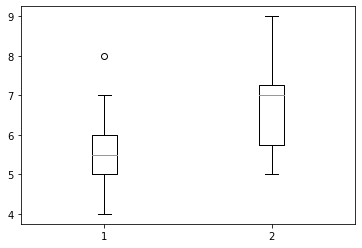

In [10]:
# matplotlib plotting
plot_date = (df1, df2)
ax = plt.boxplot(plot_date)
plt.show()

In [11]:
stats.levene(df1, df2)

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

pvalue가 0.87이면 분산이 같다고 볼 수 있다.

In [12]:
# 2-Sample t-test
t_result = stats.ttest_ind(df1, df2, equal_var = True)

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Smaple t-test의 t값 p값 출력
print("2-Sample t-test")
print("t검정통계량: {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량: -3.122
p-value : 0.003


## p.149 Paired t-test
 - 회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다. 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [14]:
# df1, df2를 직접 입력
df1 = [720,589,780,648,720,589,780,648,780,648]
df2 = [810,670,790,712,810,670,790,712,790,712]

# Paired t-test
t_result = stats.ttest_rel(df1, df2)

# Paired t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paried t-test")
print("t검정통계량: {}".format(t))
print("p-value : {}".format(p))

Paried t-test
t검정통계량: -5.324
p-value : 0.0


## 1 Proportion test
- 실제 률로 나타나는 집단에 대해 특정 비율과 같은지 검정하는 도구


 ## p.155 [연습] 1 Proportion test
 - 고급강 A제품을 가공하는 국내 고객사는 전체 중에 10% 정도가 된다.
 - 한 해 동안 A제품의 품질에 대해 노력을 하며 전체고객 중 100여 개의 업체를 표본으로 하여 가공품질을 확인한 후 15개의 업체가 만족을 표현했다. 과연 품질개선을 한 결과로 기존보다 전체 고객 중 사용비율의 차이가 있는 것인가? 유의수준 0.05

In [16]:
count = 15
n_obs = 100
value = 0.1

# Proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

# 1 Proportion test
print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

1 Proportion test
z:1.400
p:0.161


## p.158 [연습] 2 Proportion test
- 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.
- 두 공정의 불량률이 같다고 할 수 있는가? 유의수준 0.05
- 공장 1 : N1 = 1000, X1 = 4
- 공장 2 : N2 = 1200, X2 = 1

In [19]:
count = np.array([4,1])
nobs = np.array([1000, 1200])

stat, pval = proportions_ztest(count,nobs)

print('2 Proportion test')
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

2 Proportion test
z:1.553
p:0.120


p > 0.05 이므로 두 공장의 불량률은 차이가 있다고 할 수 없다.

## 카이제곱 검정
- 비교 두 자체(x, y)가 범주형일 때 분석에 사용

## p.166 [연습] 카이제곱 검정
- 근무조별로 철강제품을 생산하고 있는데, 생산 제품의 규격이 3가지 종류가 있다.
- 근무조별로 제품을 생산하는 부하는 차이가 있겠는가? (유의수준 0.05)

In [22]:
# df 생성
df = pd.DataFrame({'HSG': [270,260,236,234], 'SS': [228,285,225,262], 'SPA':[277, 284,231, 208]})

# chi-square test 실행 / 분할표
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print("chi-square test")
print('chisq: {0:0.3f}'.format(chi)) # 차이가 있다!
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))

chi-square test
chisq: 13.366
p: 0.038
degree pf freedom: 6
expected value:
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


## p.168 [실습] 추론 통계
- 노트북 컴퓨터의 6가지 제품(A,B,C,D,E,F)에 대하여 7가지 제품의 이미지를 중복 선택할 수 있도록 32명의 소비자를 대상으로 설문 조사한 Table이다. 각 제품에 대해 이미지에 대해 차이가 있겠는가? ( 유의수준 0.05)

In [28]:
df = pd.DataFrame({'A':[18,1,8,7,10,9,10], 'B':[8,2,14,5,5,9,4], 'C':[4,1,3,4,9,5,4], 'D':[4,1,2,3,2,7,3], 'E':[3,1,3,1,1,1,1], 'F':[3,25,8,10,2,1,7]})
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print("chi-square test")
print('chisq: {0:0.3f}'.format(chi)) 
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))

chi-square test
chisq: 98.274
p: 0.000
degree pf freedom: 30
expected value:
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


## ANOVA 분산분석

In [33]:
# 1) EXh_QC1.csv 데이터 가져오기
ds_Exh_QC1 = pd.read_csv("./../data/EXH_QC1.csv", engine = "python")


In [34]:
df = ds_Exh_QC1[['Flaws', 'Period']]
df.head()


,Flaws,Period
0,Scratch,Day
1,Scratch,Day
2,Peel,Day
3,Peel,Day
4,Smudge,Day


In [36]:
count = df['Flaws'].value_counts().sort_index()
print(count)

Other       6
Peel       15
Scratch    13
Smudge      6
Name: Flaws, dtype: int64


In [39]:
# Percent 계산 : 직접
percent = count / sum(count) * 100
percent

cumcnt = np.cumsum(count)
cumpct = np.cumsum(percent)

In [41]:
# DataFrame 으로 취함
count_data = pd.DataFrame({'Count' : count, 'CumCnt': cumcnt, 'Percent':percent, 'CumPct': cumpct})
count_data.columns.name="Flaws"
count_data

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [42]:
count2 = df['Period'].value_counts().sort_index()
cumcnt2 = np.cumsum(count2)
percent2 = count2/sum(count2) * 100
cumpct2 = np.cumsum(percent2)
count_data2 =  pd.DataFrame({'Count' : count2, 'CumCnt': cumcnt2, 'Percent':percent2, 'CumPct': cumpct2})
count_data2.columns.name = 'Period'
count_data2

Period,Count,CumCnt,Percent,CumPct
Day,7,7,17.5,17.5
Evening,7,14,17.5,35.0
Night,19,33,47.5,82.5
Weekend,7,40,17.5,100.0


## p.174 [연습]One way ANOVA
 - 회사 마케팅실 그룹별 직원들의 TOEIC 성적에 차이가 있는지를 알고 싶다.
 - A Group, B Group, C Group 간의 토익 점수의 차이 여부를 검정하여라( 유의수준 0.05)

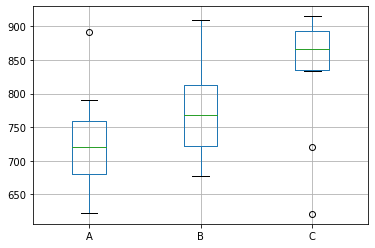

In [47]:
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                 'B':[721,821,910,678,723,790,711,790,745,891],
                 'C':[621,915,888,721,894,834,841,912,845,889]})

df.boxplot(['A','B','C'])

# C가 잘하고 A,B는 별 차이 없어보인다.
# 이상치는 남겨두고 간다

In [48]:
# ANOVA 실행
f_result = stats.f_oneway(df['A'],df['B'], df['C'])

# ANOVA의 f값 p값 저장
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-Way")
print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

One-Way
F 통계량: 4.263
p-value: 0.025
